In [1]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [2]:
print('Train data first row & shape')
print(train_data[0])
print(train_data.shape)
print('\nTrain labels first row & shape')
print(train_labels)
print(train_labels.shape)

print('\nTest data first row & shape')
print(test_data[0])
print(test_data.shape)
print('\nTest labels first row & shape')
print(test_labels)
print(test_labels.shape)

Train data first row & shape
[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
(25000,)

Train labels first ro

In [3]:
max([max(sequence) for sequence in train_data])

9999

In [4]:
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

decoded_review = " ".join([reverse_word_index.get(i - 3, '?') for i in train_data[2]])
print(decoded_review)

? this has to be one of the worst films of the 1990s when my friends i were watching this film being the target audience it was aimed at we just sat watched the first half an hour with our jaws touching the floor at how bad it really was the rest of the time everyone else in the theatre just started talking to each other leaving or generally crying into their popcorn that they actually paid money they had ? working to watch this feeble excuse for a film it must have looked like a great idea on paper but on film it looks like no one in the film has a clue what is going on crap acting crap costumes i can't get across how ? this is to watch save yourself an hour a bit of your life


In [5]:
import numpy as np
def vectorize(sequences, dimensions=10000):
  results = np.zeros((len(sequences), dimensions))
  for i, sequence in enumerate(sequences):
    for j in sequence:
      results[i,j] = 1
  return results

x_train = vectorize(train_data)
x_test  = vectorize(test_data)

print('Train data multi one hot encoded & shape')
print(x_train[0])
print(x_train.shape)

print('\nTest data multi one hot encoded & shape')
print(x_test[0])
print(x_test.shape)

Train data multi one hot encoded & shape
[0. 1. 1. ... 0. 0. 0.]
(25000, 10000)

Test data multi one hot encoded & shape
[0. 1. 1. ... 0. 0. 0.]
(25000, 10000)


In [6]:
y_train = np.asarray(train_labels).astype('float32')
y_test  = np.asarray(test_labels).astype('float32')

print('Train labels encoded, first row & shape')
print(y_train)
print(y_train.shape)

print('\nTest labels encoded, first row & shape')
print(y_test)
print(y_test.shape)

Train labels encoded, first row & shape
[1. 0. 0. ... 0. 1. 0.]
(25000,)

Test labels encoded, first row & shape
[0. 1. 1. ... 0. 0. 0.]
(25000,)


In [7]:
from tensorflow import keras
from keras import layers

In [27]:
model = keras.Sequential([
    layers.Dense(16, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='tanh')
])

In [28]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [29]:
x_val           = x_train[:10000]
x_partial_train = x_train[10000:]
y_val           = y_train[:10000]
y_partial_train = y_train[10000:]

print('x partial train shape')
print(x_partial_train.shape)
print('\nx validation shape')
print(x_val.shape)
print('\ny partial train shape')
print(y_partial_train.shape)
print('\ny validation shape')
print(y_val.shape)

x partial train shape
(15000, 10000)

x validation shape
(10000, 10000)

y partial train shape
(15000,)

y validation shape
(10000,)


In [30]:
history = model.fit(x_partial_train,
                    y_partial_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 88ms/step - accuracy: 0.6347 - loss: 0.9992 - val_accuracy: 0.8262 - val_loss: 0.4007
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.8903 - loss: 0.3189 - val_accuracy: 0.8650 - val_loss: 0.4461
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.9251 - loss: 0.2255 - val_accuracy: 0.8615 - val_loss: 0.3423
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.9472 - loss: 0.1724 - val_accuracy: 0.8717 - val_loss: 0.3509
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.9581 - loss: 0.1449 - val_accuracy: 0.8732 - val_loss: 0.7137
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.9740 - loss: 0.1140 - val_accuracy: 0.8796 - val_loss: 0.5861
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.9784 - loss: 0.0850 - val_accuracy: 0.8795 - val_loss: 0.6126
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9836 - loss: 0.0677 - val_accuracy: 0.8732 - v

In [22]:
history_dict = history.history
print(history_dict.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


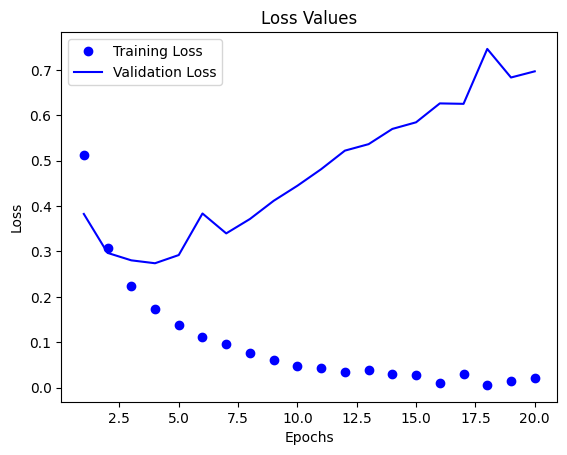

In [31]:
import matplotlib.pyplot as plt

training_loss_values   = history_dict['loss']
validation_loss_values = history_dict['val_loss']
epochs                 = range(1, len(training_loss_values)+1)

plt.plot(epochs, training_loss_values, 'bo', label='Training Loss')
plt.plot(epochs, validation_loss_values, 'b', label='Validation Loss')
plt.title('Loss Values')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

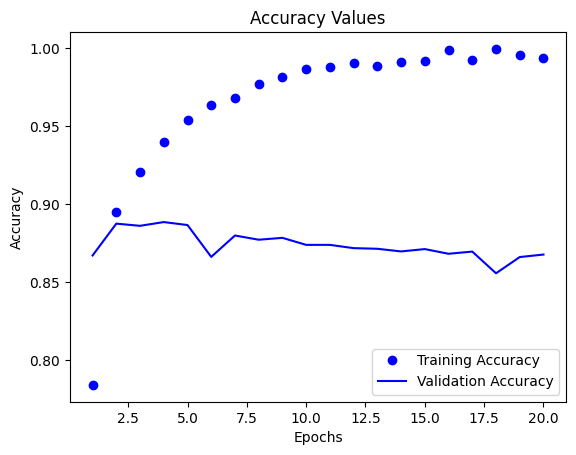

In [32]:
training_acc   = history_dict['accuracy']
validation_acc = history_dict['val_accuracy']

plt.plot(epochs, training_acc, 'bo', label='Training Accuracy')
plt.plot(epochs, validation_acc, 'b', label='Validation Accuracy')
plt.title('Accuracy Values')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [33]:
generalized_model = keras.Sequential([
    layers.Dense(32, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='tanh')
])

generalized_model.compile(optimizer='rmsprop',
                         loss='binary_crossentropy',
                          metrics=['accuracy'])

generalized_model.fit(x_train, y_train, epochs=4, batch_size=512)
results = generalized_model.evaluate(x_test, y_test)

test_loss, test_accuracy = results
print(f'\nModel loss is: {test_loss}')
print(f'\nModel accuracy is: {test_accuracy}')

Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.6622 - loss: 1.1367
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.8997 - loss: 0.3040
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - accuracy: 0.9268 - loss: 0.2341
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.9472 - loss: 0.1963
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8778 - loss: 0.4668

Model loss is: 0.4758126437664032

Model accuracy is: 0.8794400095939636


In [34]:
model.predict(x_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


array([[-0.59883153],
       [ 1.        ],
       [ 0.9999223 ],
       ...,
       [-0.59445256],
       [-0.50233626],
       [ 0.9468809 ]], dtype=float32)